# Supervised Machine Learning: Predict Titanic Survival

The RMS Titanic set sail on its maiden voyage in 1912, crossing the Atlantic from Southampton, England to New York City. The ship never completed the voyage, sinking to the bottom of the Atlantic Ocean after hitting an iceberg, bringing down 1,502 of 2,224 passengers onboard.

The goal of this project is to create a Logistic Regression model that predicts which passengers survived the sinking of the Titanic, based on features like age and class.

The data we will be using for training our model is provided by Kaggle.

Columns description:

- `PassengerId:` passenger identification number;
- `Survived:` binary code, that denotes whether a passenger survived (1 - "Yes") or not (0 - "No").
- `Pclass:` passenger class: 1 - 1st, 2 - 2nd, 3 - 3rd;
- `Name:` passenger name;
- `Sex:` passenger sex;
- `Age:` passenger age;
- `SibSp:` number of siblings/ spauses aboard;
- `Parch:` number of parants/ children aboard;
- `Ticket:` ticket number;
- `Fare:` passenger fare (£);
- `Cabin:` cabin number;
- `Embarked:` port of embarcation (C- Cherbourg, S- Southampton,Q- Queenstown )


### Exploratory Data Analysis

The file passengers.csv contains the data of 892 passengers onboard the Titanic when it sank that fateful day. Let’s begin by loading the data into a pandas DataFrame named `passengers`, then print it and inspect the columns. 

In [1]:
# Basic imports related to analysis
import pandas as pd
import numpy as np

# Import for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Imports for ml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the passenger data
passengers = pd.read_csv('passengers.csv')
passengers.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Let's print unique values of columns that have a low number of variations in their values to see if everything is ok there. 

In [3]:
columns = ['Pclass', 'SibSp', 'Parch', 'Sex', 'Survived', 'Embarked']
for i in range(len(columns)):
    print(columns[i], passengers[columns[i]].unique())

Pclass [3 1 2]
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Sex ['male' 'female']
Survived [0 1]
Embarked ['S' 'C' 'Q' nan]


Result: 
- A lot of values are missing in the `Age` column and we'll need this column for feature engineering, so we are goint to deal with during feature engineering stage. 
- Much worse situation with the `Cabin`, but we won't need it for now. 
- The `Embarked` has some missing values but it's not critical info for our analysis either, so we'll skip it too.

Let's check some statistics for this dataset.

In [4]:
passengers.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
passengers.sort_values('Fare', ascending=False).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S


In [6]:
passengers.sort_values('Fare', ascending=True).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S


In [7]:
len(passengers[passengers.Fare == 0])

15

Result: There is an issue with the `Fare`, it appears that 3 passengers paid a lot more than others - about `512£` and 15 paid `0£` for their tickets that may affect calculations. Let's remove those for now. 

In [8]:
passengers_by_fare = passengers.sort_values('Fare', ascending=False)[4:-15]
passengers = passengers_by_fare.sort_values('PassengerId').reset_index(drop=True)
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
len(passengers[passengers.Fare == 0])

0

### Feature Ingeneering

Given the saying: "Women and children first", `Sex` and `Age` seem like good features to predict survival. To perform any calculations we need numerical values, so let’s map the text values in the `Sex` column to a numerical value. All values `female` will be replaced with `1` and all values `male` will be replaced with `0`.

In [10]:
# Update sex column to numerical
passengers['Sex_num'] = passengers.Sex.map({'female': 1, 'male': 0})

Now we are going to display on several graphs relationships between several variables to find how the number of survivors changes based on such parameters as `Sex`, `Age` and `Fare`. First we'll explore the general numbers of survivors depending on `Sex` parameter on a histogram. 

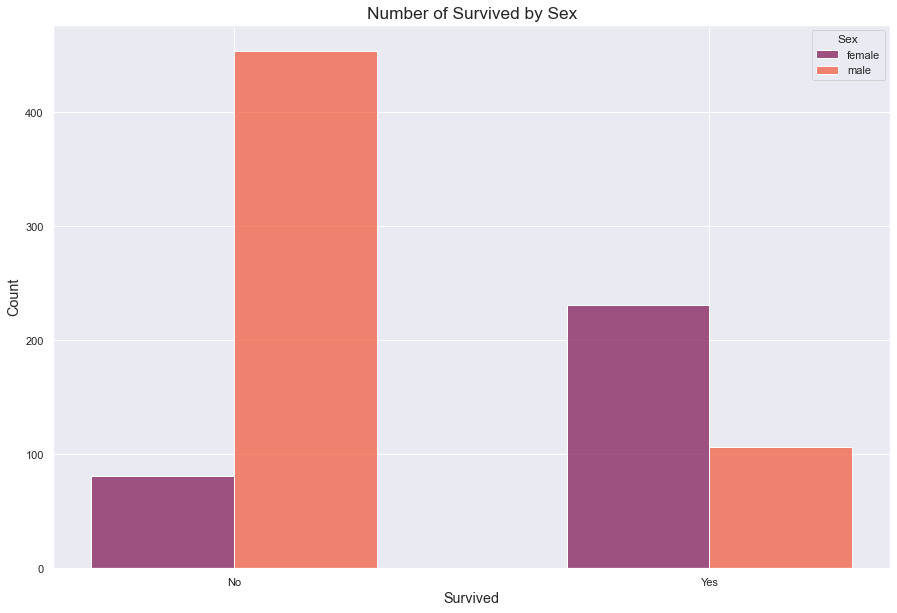

In [11]:
# Create separate column with Survived values in str to correctly draw histplot
passengers['Survived_str'] = passengers.Survived.map({0:'No', 1:'Yes'}).astype(str)

# Set darkgrid for all plots of the project
sns.set(style='darkgrid')

def visualise_hist(dataset, column_names, palette, title, xlabel, ylabel):
    plt.figure(figsize = (15,10))
    ax = sns.histplot(
        data=dataset, 
        x=column_names[0], 
        hue=column_names[1],
        hue_order=['female','male'], 
        shrink=0.6, 
        multiple='dodge', 
        palette= palette
        )

    # Add descriptions
    ax.set_title(title, fontsize = 'x-large')
    ax.set_xlabel(xlabel, fontsize = 'large')
    ax.set_ylabel(ylabel, fontsize = 'large')
    ax.set_xticks([0, 1])

visualise_hist(
    passengers, 
    column_names=['Survived_str', 'Sex'], 
    palette='rocket', 
    title='Number of Survived by Sex', 
    xlabel='Survived', 
    ylabel='Count')

Result: 
- Clearly, most of the people died, among them the majority were males.
- A little more than 200 women and about 100 men survived. 
 
Now let's see on a box-plot the change in survival of men and women depending on `Age` parameter.

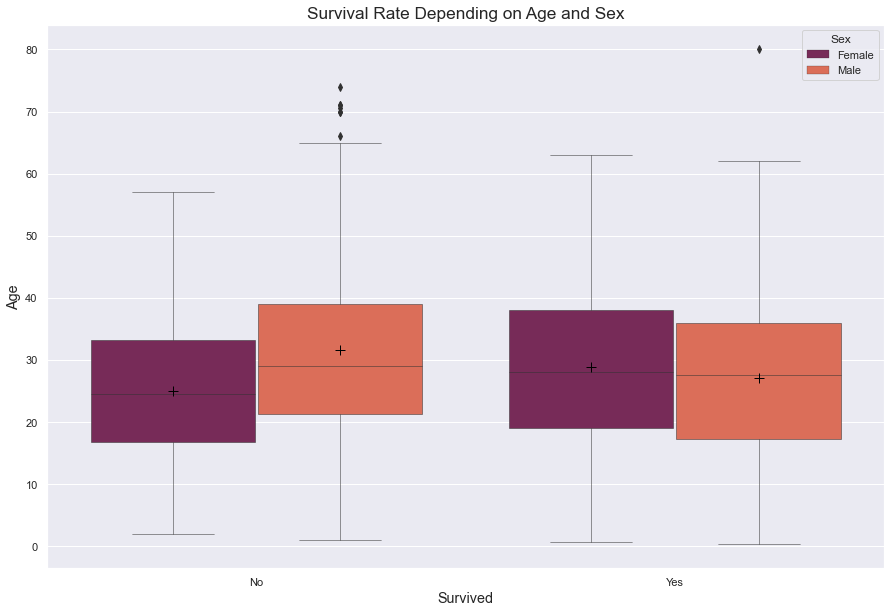

In [12]:
# Draw boxplot
def visualise_boxplot(dataset, column_names, palette, title, xlabel, ylabel):
    plt.figure(figsize = (15,10))
    ax = sns.boxplot(
        data=dataset,
        x= column_names[0], 
        y= column_names[1],
        hue=column_names[2],
        hue_order=[1,0],
        palette=palette, 
        showmeans=True,
        meanprops={"marker": "+",
            "markeredgecolor": "black",
            "markersize": "10"},
        linewidth=0.5)

    # Add descriptions
    ax.set_title(title, fontsize = 'x-large')
    ax.set_xlabel(xlabel, fontsize = 'large')
    ax.set_ylabel(ylabel, fontsize = 'large')
    ax.set_xticklabels(['No', 'Yes'])
    
    ax.legend(title='Sex')
    ax.legend_.texts[0].set_text('Female')
    ax.legend_.texts[1].set_text('Male')

    return plt.show()

visualise_boxplot(
    passengers, 
    column_names=['Survived', 'Age', 'Sex_num'], 
    palette='rocket', 
    title='Survival Rate Depending on Age and Sex', 
    xlabel='Survived', 
    ylabel='Age'
)

In [13]:
passengers.sort_values('Age', ascending=False).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Survived_str
619,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,0,Yes
832,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,0,No
483,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0,No
95,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0,No
115,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,0,No


Result: Among females survived those who are generally older - around `22-38` years, among males the other way around - survived those who generally younger in a range from `18` to `37` or so, with one outlier who is `80`.

Now let's check what ratios we'll get if we'll focus on `Fare` and `Sex`.

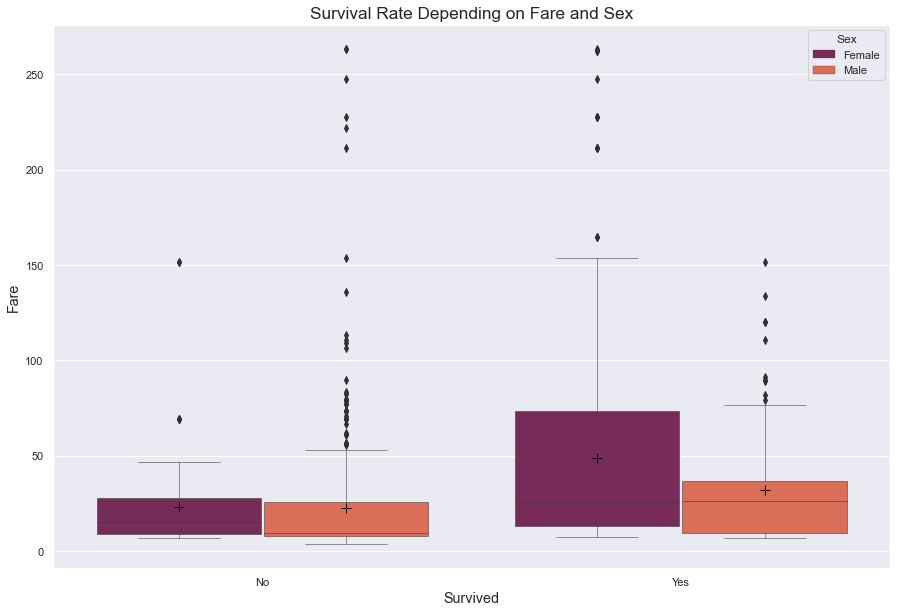

In [14]:
visualise_boxplot(
    passengers, 
    column_names=['Survived', 'Fare', 'Sex_num'], 
    palette='rocket', 
    title='Survival Rate Depending on Fare and Sex', 
    xlabel='Survived', 
    ylabel='Fare'
)

Result: 
- There is a big gap between median (horizontal line on the box) and mean (`+` sign), which telling us that data is seriously affected by `Fare` outliers that have high values. 
- Among survivors a lot of females in general, but more of those who managed to pay at least `10£` or more for their tickets.  
- Surprisingly enough there are not only a lot of males and females who had low-priced tickets died, but also a lot of males who paid `100£` and more for theirs. 

<AxesSubplot:title={'center':' Correlations of different parameters of Titanic passengers'}>

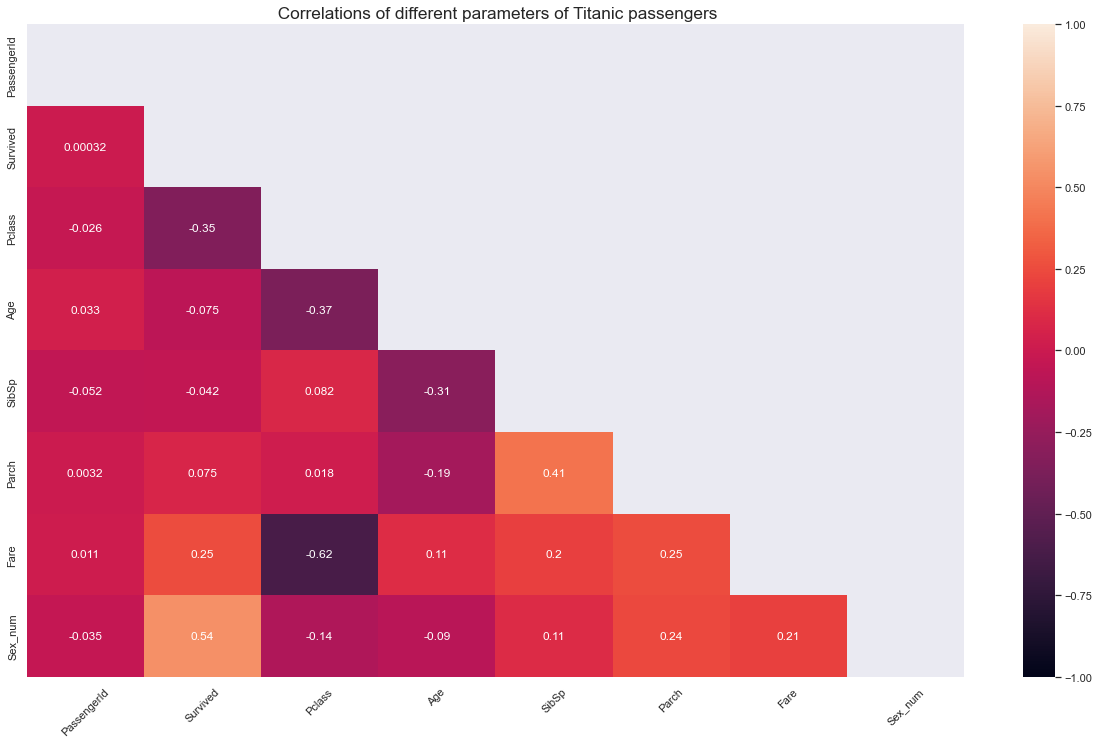

In [15]:
def visualise_heatmap(dataset_corr, corr_objects):
    # Prepare figure
    plt.figure(figsize = (21,12))

    # Draw heatmap as triangle
    mask = np.triu(np.ones_like(dataset_corr, dtype=bool))
    # Add descriptions
    plt.title(' Correlations of ' + corr_objects, fontsize= 'x-large')
    plt.xticks(rotation=45)

    # Plot heatmap
    heatmap = sns.heatmap(dataset_corr, annot=True, vmax=1, vmin=-1, cmap='rocket', mask=mask)
    return heatmap

visualise_heatmap(passengers.corr(), 'different parameters of Titanic passengers') 

Considering our initial goal and exploratory analysis we are going to use as features for Logistic Regression model the following parameters: 
- `Age`;
- `Sex`;

TBC

There were a lot of `nan`s in `Age` column, when we last check, so now it's time to deal with it to prepare this column for the model.

In [16]:
passengers.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 24.  , 46.  , 59.  , 71.  ,
       23.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

There are some `nan`s so let's fill all the empty `Age` values in passengers with the mean age.

In [17]:
# Fill the nan values in the age column
passengers.Age.fillna(value=passengers.Age.mean().round(2), inplace=True)
passengers.Age.unique()

array([22.  , 38.  , 26.  , 35.  , 29.63, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 24.  , 46.  , 59.  , 71.  ,
       23.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

Given the strict class system onboard the Titanic, let’s utilize the `Pclass` column, or the passenger class, as another feature. Create a new column named `FirstClass` that stores `1` for all passengers in first class and `0` for all other passengers.

In [18]:
passengers['FirstClass'] = passengers['Pclass'].apply(lambda x: 1 if x == 1 else 0)

Let's do the same but now creating a new column named `SecondClass` that stores `1` for all passengers in second class and `0` for all other passengers.

In [19]:
passengers['SecondClass'] = passengers['Pclass'].apply(lambda x: 1 if x == 2 else 0)

In [20]:
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Survived_str,FirstClass,SecondClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,No,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Yes,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Yes,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Yes,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,No,0,0


### Select and Split the Data

Now that we have cleaned and prepared our data, let’s select the columns we want to build our model on. We are going to select columns `Sex`, `Age`, `FirstClass`, and `SecondClass` and store them in a variable named `features`. After that we'll select column `Survived` and store it a variable named `survival`.


In [21]:
features = passengers[['Sex', 'Age', 'FirstClass', 'SecondClass']]
features.head(5)

,Sex,Age,FirstClass,SecondClass
0,male,22.0,0,0
1,female,38.0,1,0
2,female,26.0,0,0
3,female,35.0,1,0
4,male,35.0,0,0


In [22]:
survival = passengers[['Survived']]
survival

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
867,0
868,1
869,0
870,1


Now let's split the data into training and test sets. We’ll use the training set to train the model and the test set to evaluate the model.

In [23]:
# Perform train, test, split
train_data, test_data, train_cats, test_cats = train_test_split(features, survival)

### Normalize the Data

TBC
